In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../src') 

from utils.data_loader import load_data

# Load data
df = load_data('../data/AAPL_historical_data.csv')


Data loaded successfully from ../data/AAPL_historical_data.csv


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10998 non-null  object 
 1   Open          10998 non-null  float64
 2   High          10998 non-null  float64
 3   Low           10998 non-null  float64
 4   Close         10998 non-null  float64
 5   Adj Close     10998 non-null  float64
 6   Volume        10998 non-null  int64  
 7   Dividends     10998 non-null  float64
 8   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 773.4+ KB


1. Summary Statistics & Missing-Value Report

In [3]:
print(df.describe(include='all'))

              Date          Open          High           Low         Close  \
count        10998  10998.000000  10998.000000  10998.000000  10998.000000   
unique       10998           NaN           NaN           NaN           NaN   
top     2024-07-30           NaN           NaN           NaN           NaN   
freq             1           NaN           NaN           NaN           NaN   
mean           NaN     22.299160     22.539055     22.068367     22.312754   
std            NaN     46.003685     46.496031     45.540929     46.037660   
min            NaN      0.049665      0.049665      0.049107      0.049107   
25%            NaN      0.299107      0.303710      0.290179      0.298549   
50%            NaN      0.531250      0.537946      0.522321      0.531250   
75%            NaN     20.204196     20.389554     19.998036     20.196160   
max            NaN    236.479996    237.229996    233.089996    234.820007   

           Adj Close        Volume     Dividends  Stock Splits 

In [4]:
number_stats = df.describe(include=[np.number]) 
number_stats

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,1.099800e+04,10998.000000,10998.000000
mean,22.299160,22.539055,22.068367,22.312754,21.494496,3.180806e+08,0.000752,0.001546
std,46.003685,46.496031,45.540929,46.037660,45.561916,3.354523e+08,0.011753,0.083663
min,0.049665,0.049665,0.049107,0.049107,0.037857,0.000000e+00,0.000000,0.000000
25%,0.299107,0.303710,0.290179,0.298549,0.241840,1.132545e+08,0.000000,0.000000
50%,0.531250,0.537946,0.522321,0.531250,0.432079,2.057412e+08,0.000000,0.000000
75%,20.204196,20.389554,19.998036,20.196160,17.253029,3.985275e+08,0.000000,0.000000
max,236.479996,237.229996,233.089996,234.820007,234.548523,7.421641e+09,0.250000,7.000000


In [5]:
df.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

2. Convert date to datetime

In [6]:
print(df.dtypes)

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object


In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed', utc=True)
df['Date']

0       1980-12-12 00:00:00+00:00
1       1980-12-15 00:00:00+00:00
2       1980-12-16 00:00:00+00:00
3       1980-12-17 00:00:00+00:00
4       1980-12-18 00:00:00+00:00
                   ...           
10993   2024-07-24 00:00:00+00:00
10994   2024-07-25 00:00:00+00:00
10995   2024-07-26 00:00:00+00:00
10996   2024-07-29 00:00:00+00:00
10997   2024-07-30 00:00:00+00:00
Name: Date, Length: 10998, dtype: datetime64[ns, UTC]

In [7]:
# For prices, we typically want to keep genuine market movements
# But we can verify if extreme prices coincide with splits:

# Check if max price coincides with stock splits
max_price_date = df[df['Close'] == df['Close'].max()].index[0]
split_on_max = df.loc[max_price_date, 'Stock Splits']
print(f"Stock split on max price date: {split_on_max}")

Stock split on max price date: 0.0


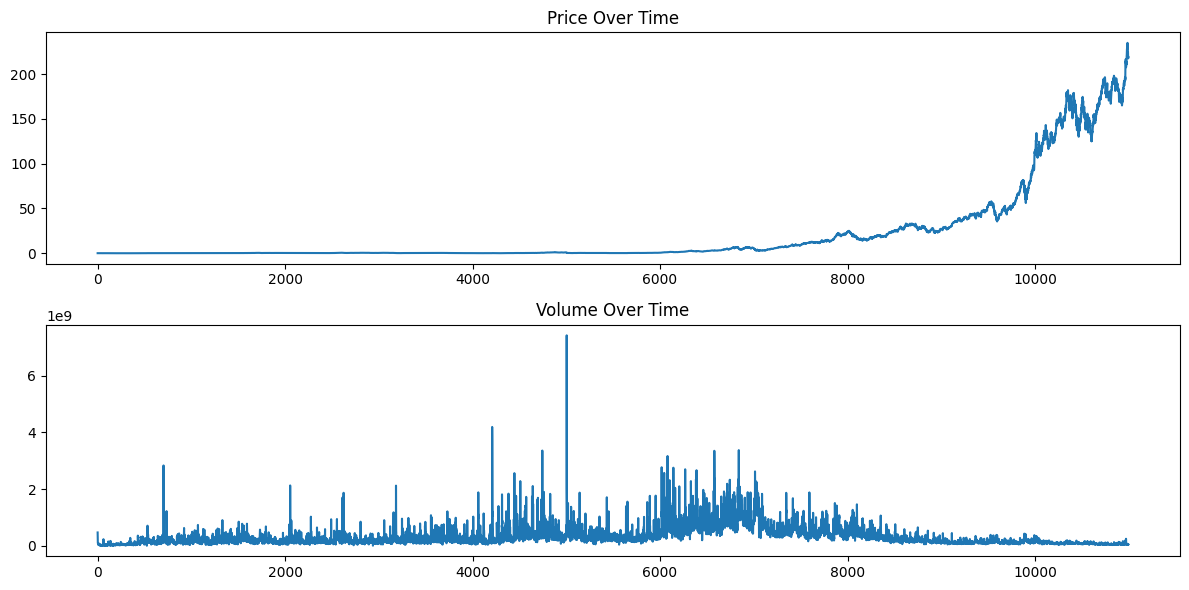

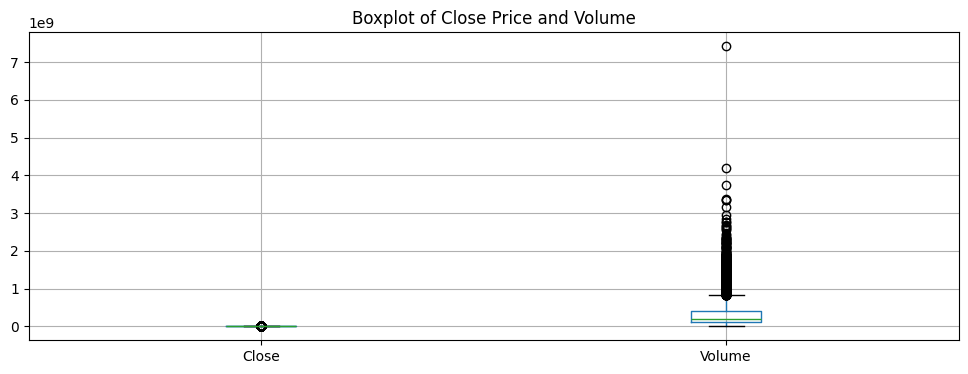

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'])
plt.title('Price Over Time')

plt.subplot(2, 1, 2)
plt.plot(df.index, df['Volume'])
plt.title('Volume Over Time')
plt.tight_layout()
plt.show()

# Boxplots for visual outlier detection
plt.figure(figsize=(12, 4))
df[['Close', 'Volume']].boxplot()
plt.title('Boxplot of Close Price and Volume')
plt.show()

In [12]:
# save cleaned data
df.to_csv('../data/AAPL_cleaned.csv', index=False)